In [10]:
import os
import numpy as np
import pandas as pd
from meerCRAB_code.model import compile_model,model_save 
import matplotlib.pylab as plt
from keras.utils import np_utils
from time import gmtime, strftime
from meerCRAB_code.util import makedirs, ensure_dir
from meerCRAB_code.prediction_phase import load_new_candidate, realbogus_prediction
from tensorflow.python.keras.models import model_from_json

from astropy.table import Table

In [11]:
model_path = './meerCRAB_model/'
model_name = 'NET3_threshold_9_NRD'

# read fits table vetting_4Zafiirah_20200714102528.fits
fits_table = './data/vetting_4Zafiirah_20200714102528.fits'
table = Table.read(fits_table)

# only use the first 100 entries for now
table = table[30000:30100]

data_red = table['THUMBNAIL_RED']
data_ref = table['THUMBNAIL_REF']
data_D = table['THUMBNAIL_D']
data_Scorr = table['THUMBNAIL_SCORR']



In [12]:
data_red.shape

(100, 100, 100)

In [14]:
index_30x30 = (slice(None,None), slice(35,65), slice(35,65))
data_test_3 = np.stack((data_red[index_30x30],
                        data_ref[index_30x30],
                        data_D[index_30x30]), axis=3)

data_test_4 = np.stack((data_red[index_30x30],
                        data_ref[index_30x30],
                        data_D[index_30x30],
                        data_Scorr[index_30x30]), axis=3)
ID_test = np.arange(len(table))
print (ID_test.shape)

print (data_test_3.shape, data_test_4.shape)

(100,)
(100, 30, 30, 3) (100, 30, 30, 4)


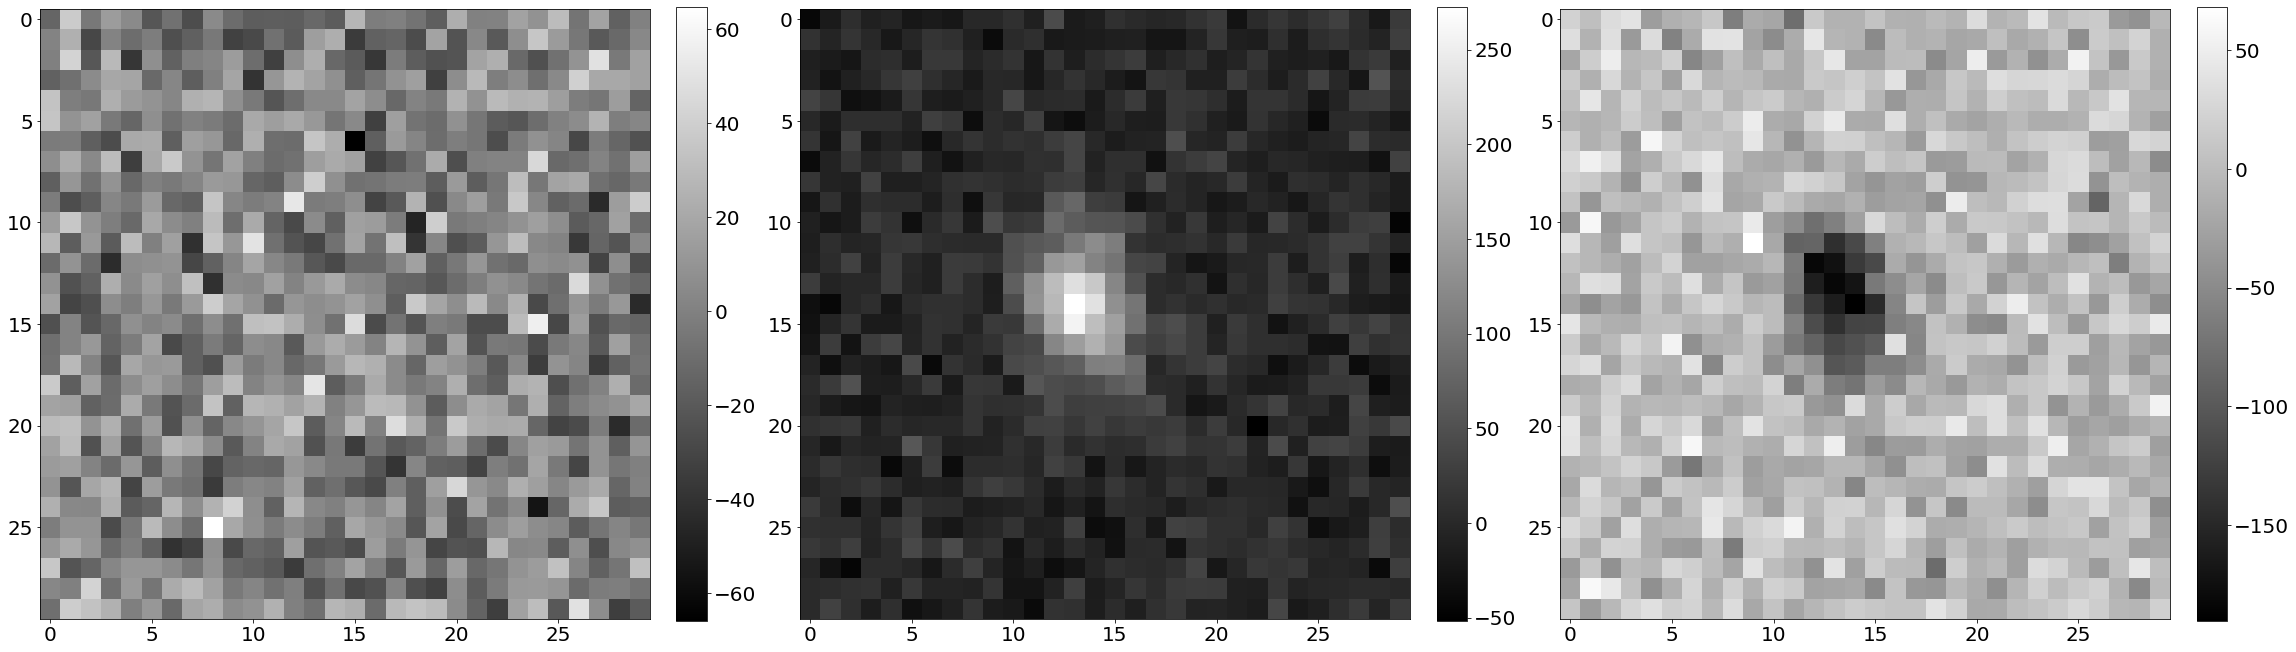

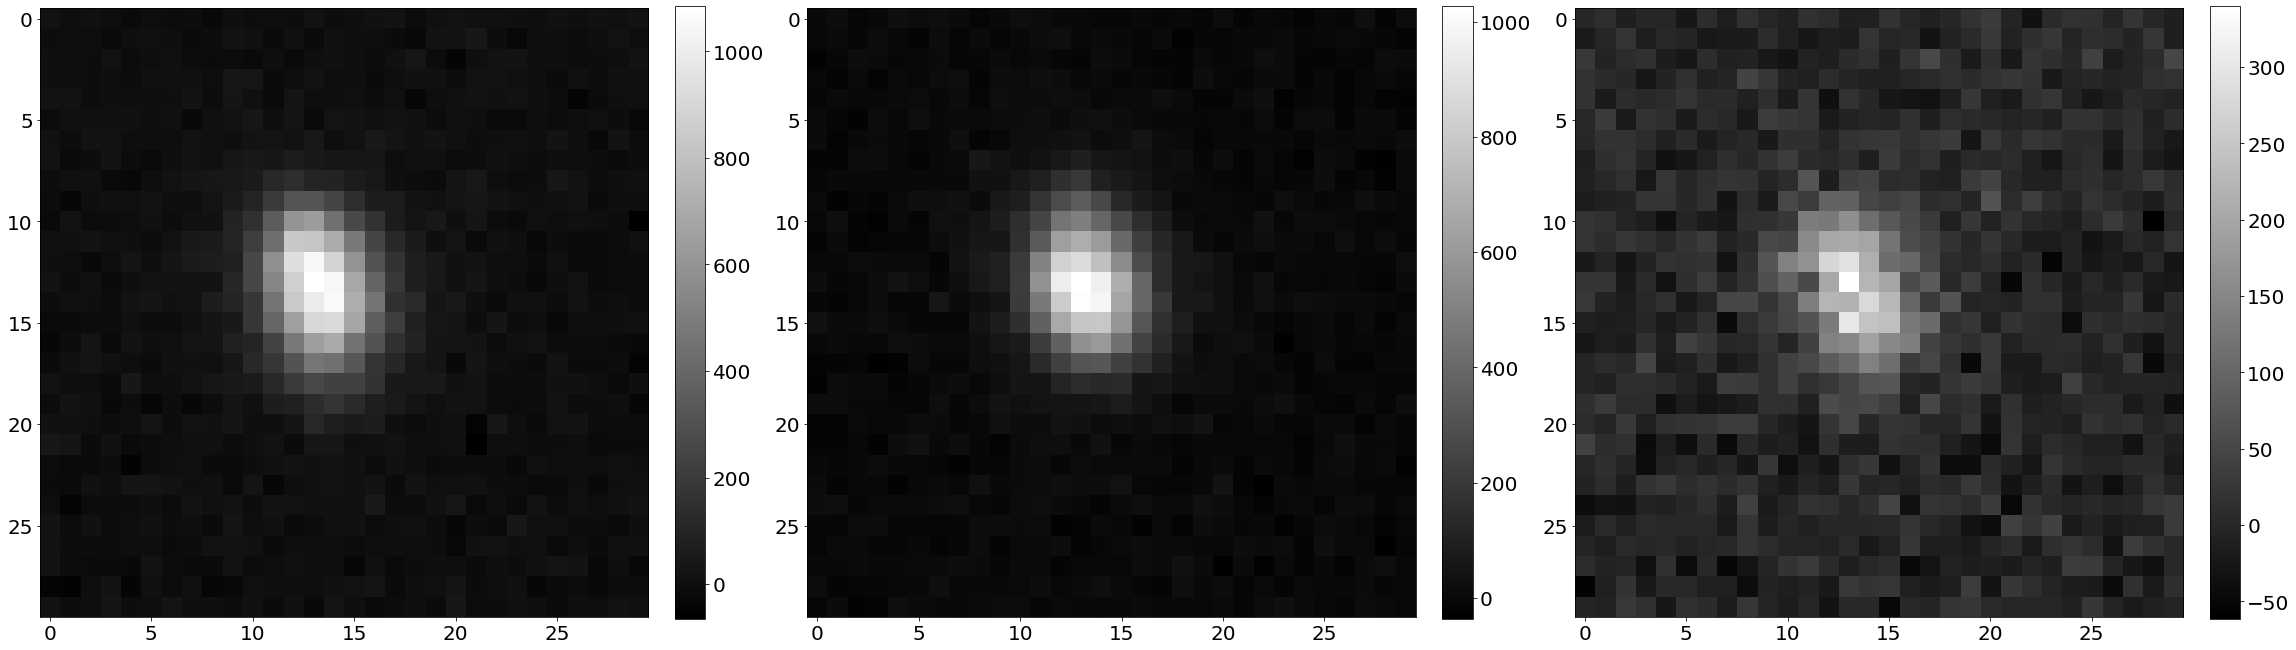

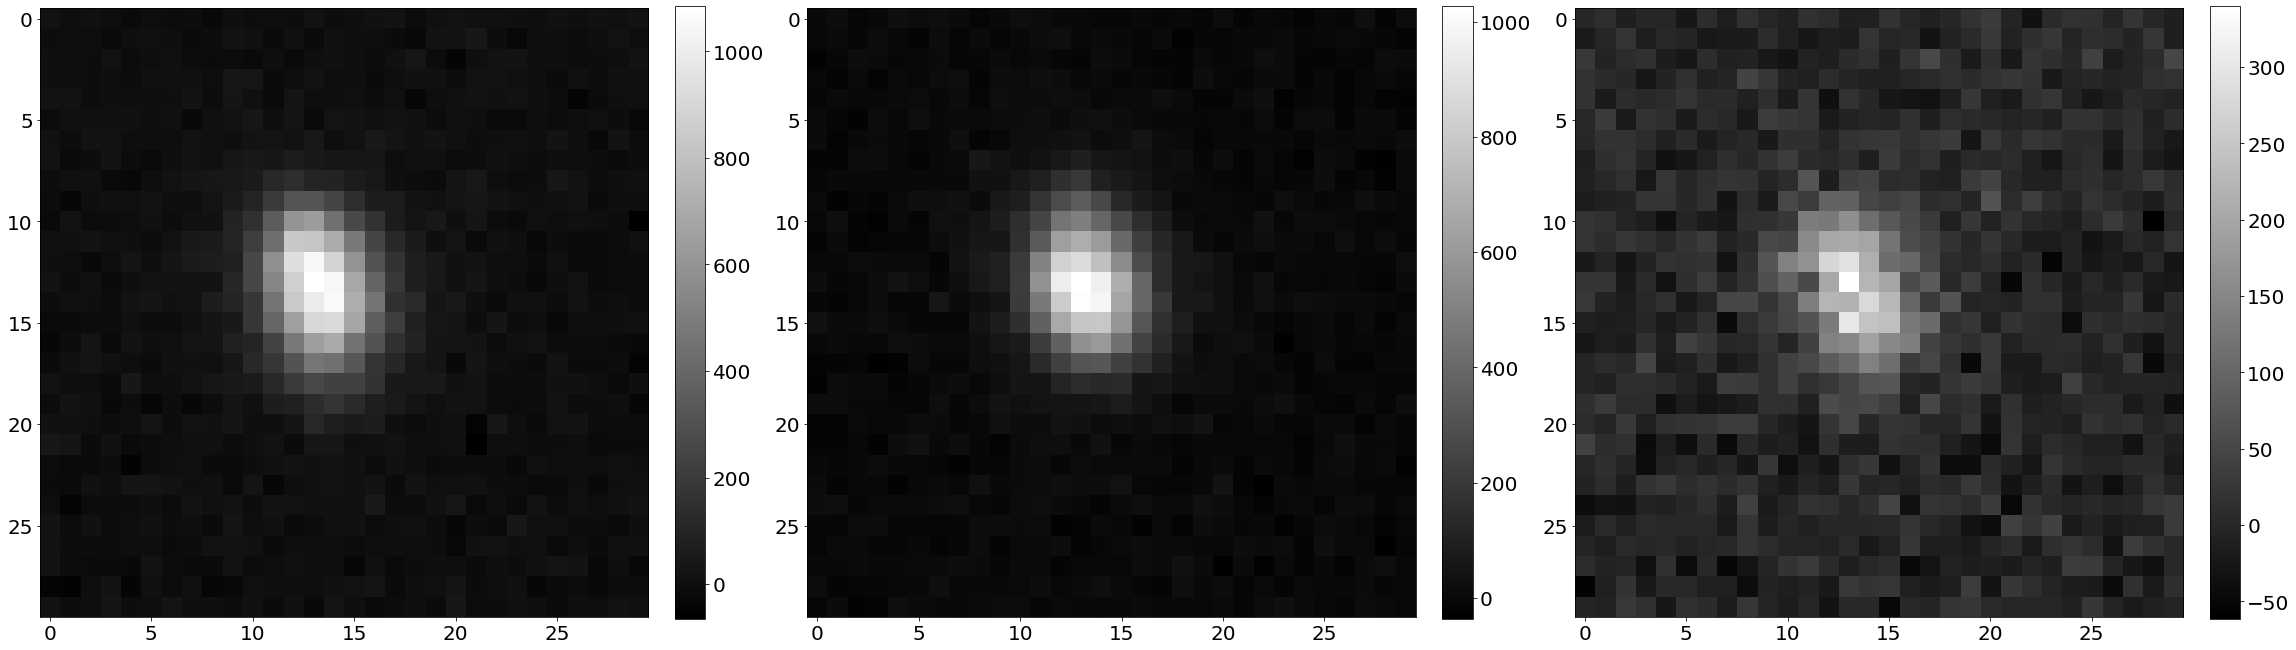

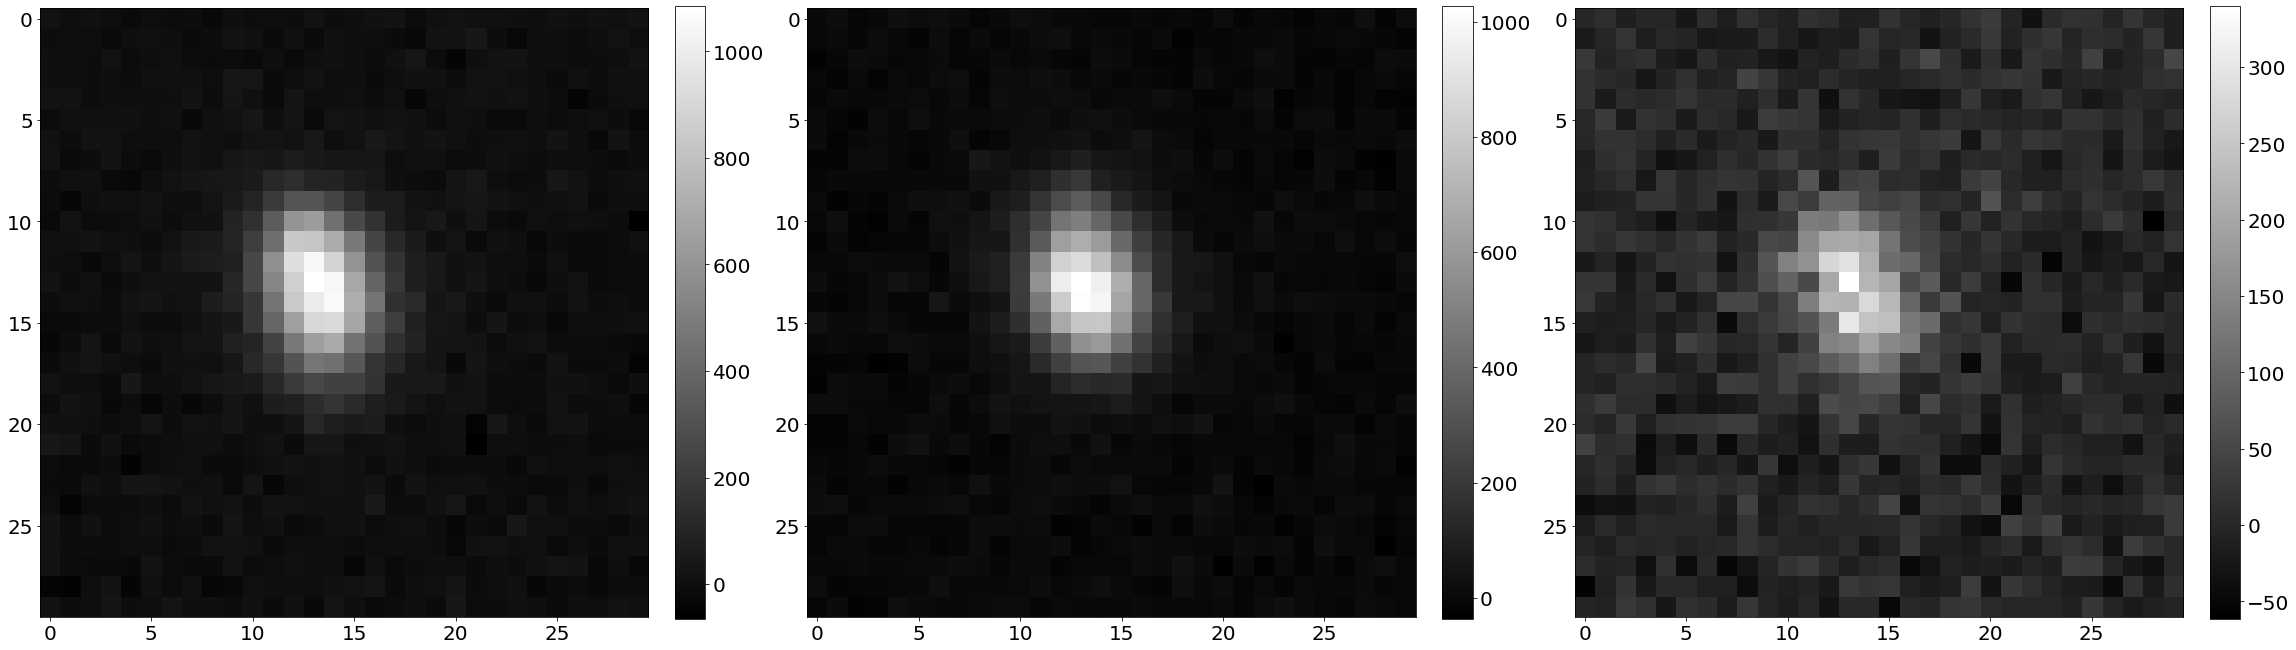

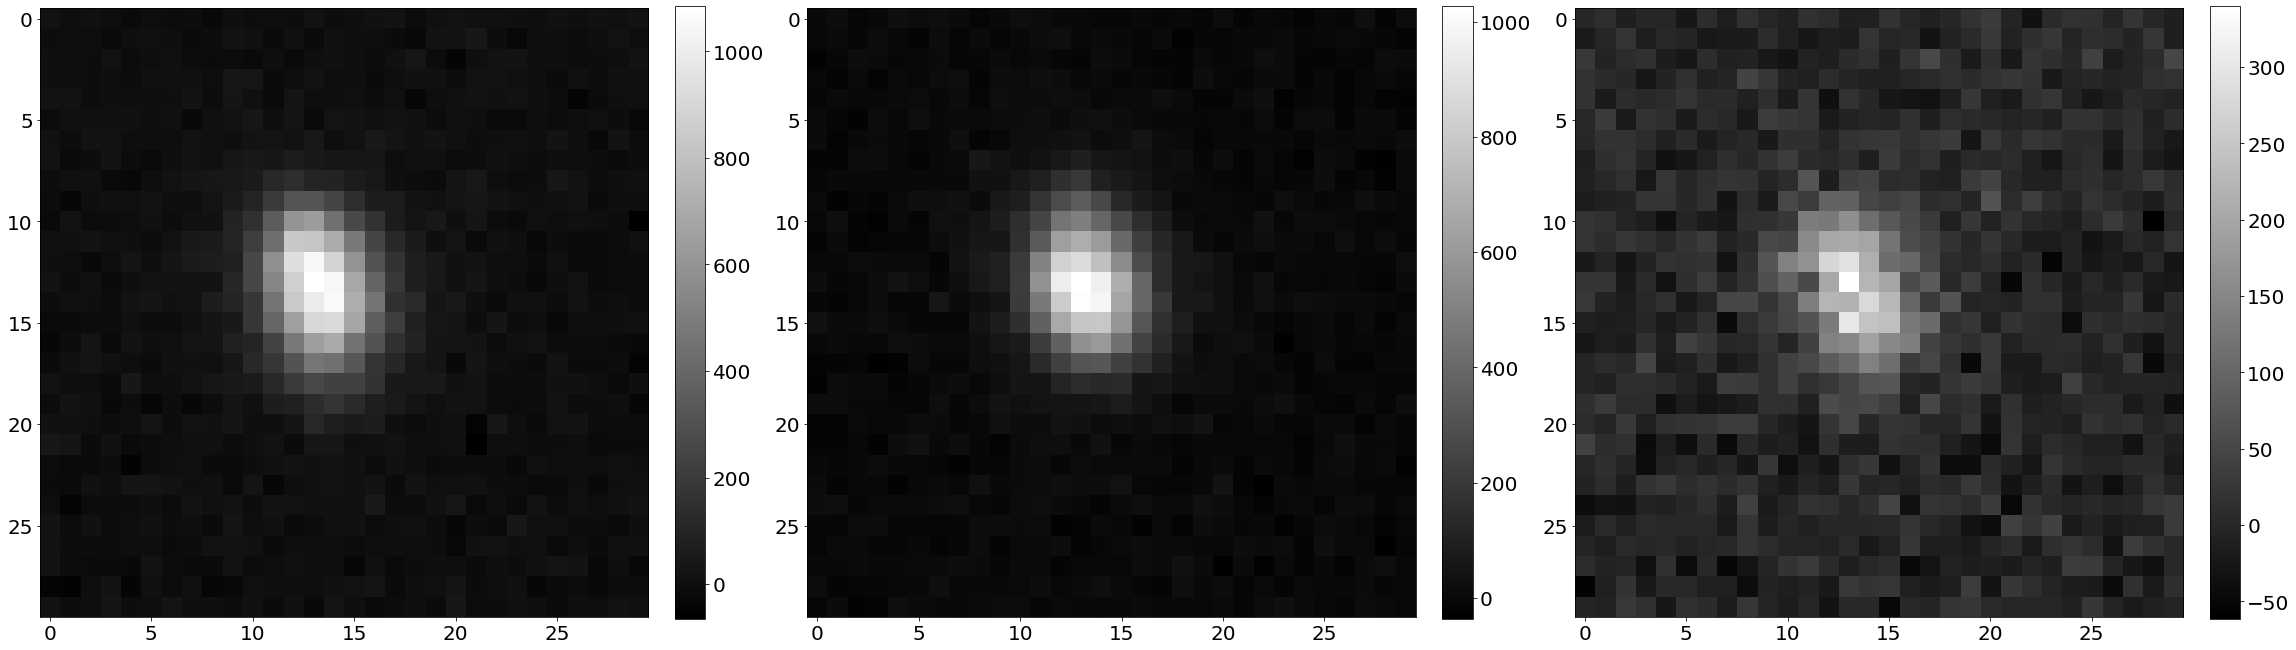

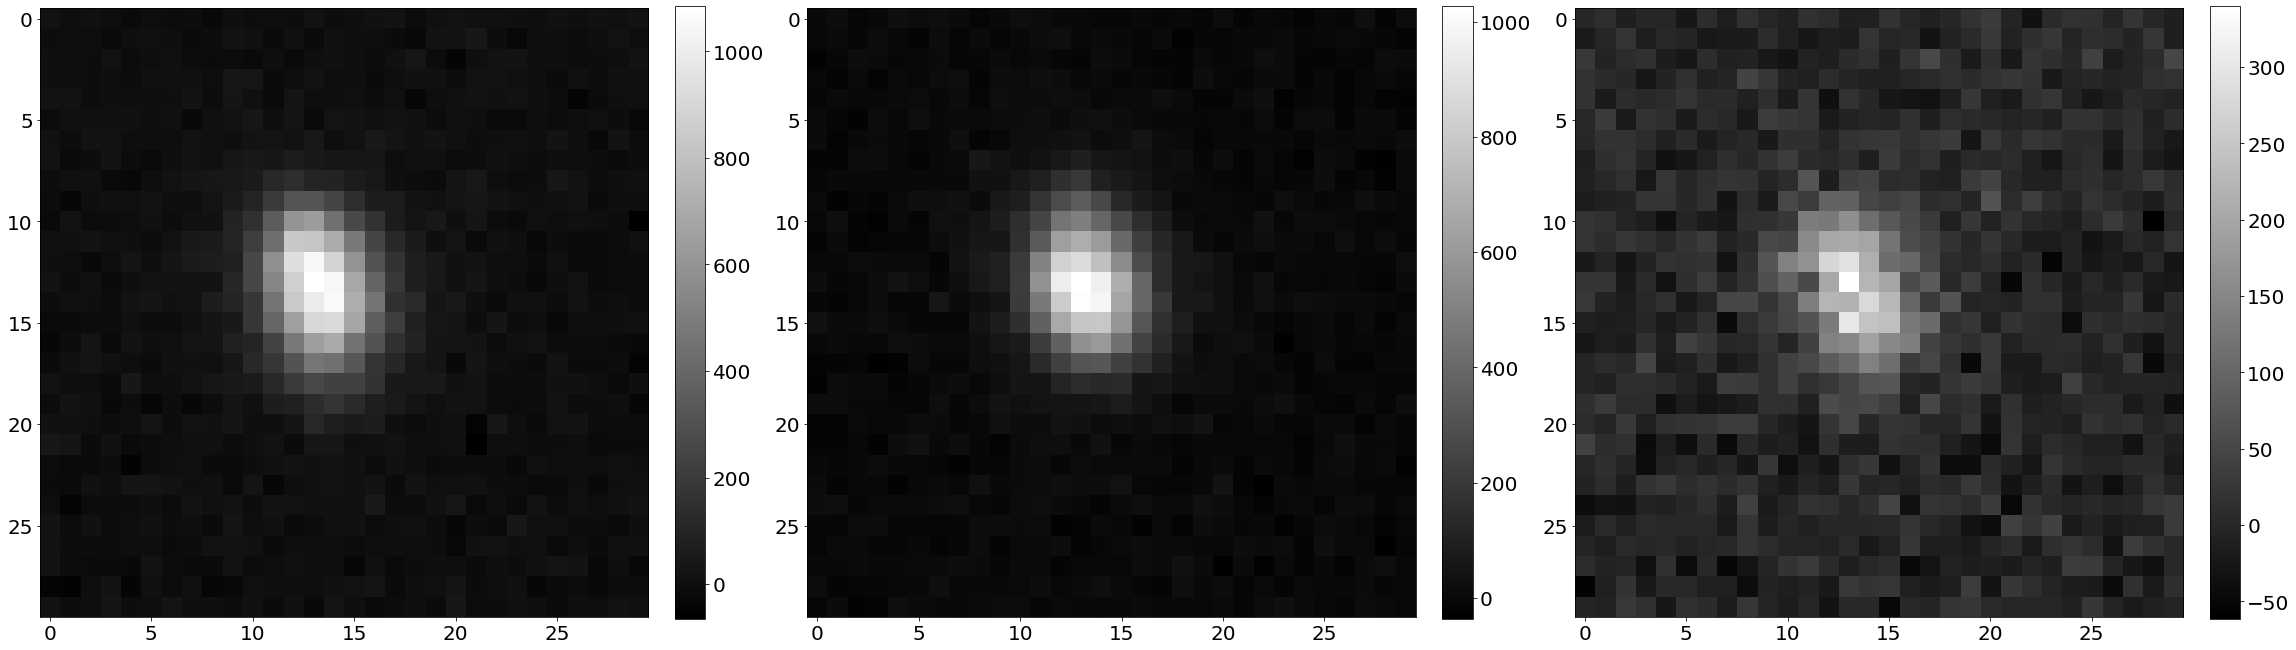

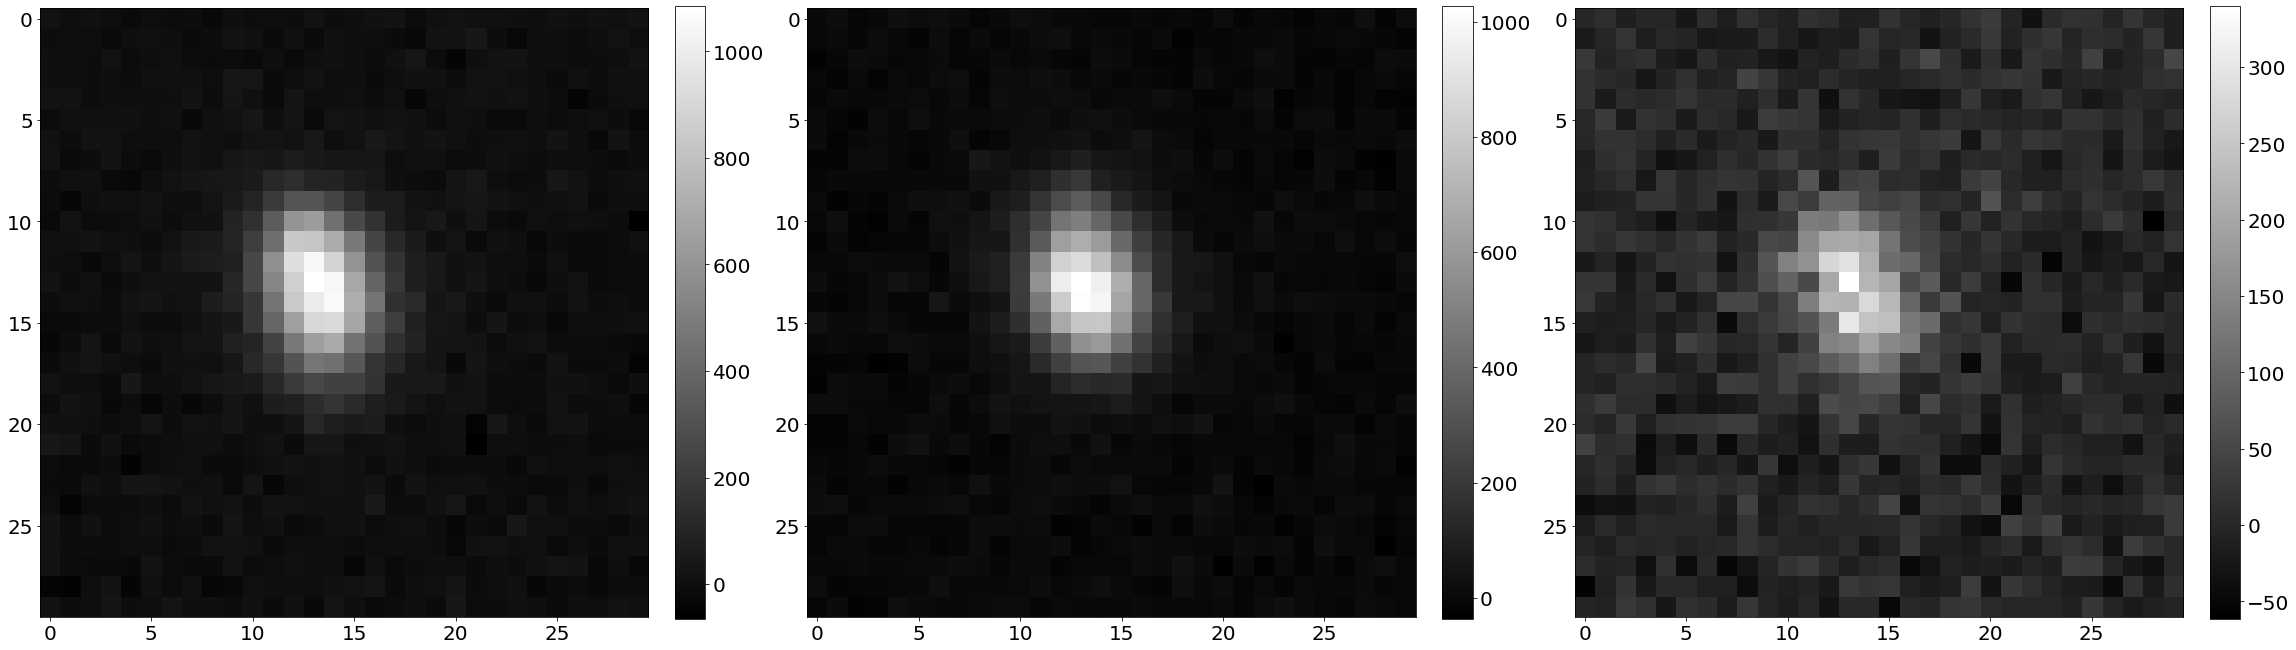

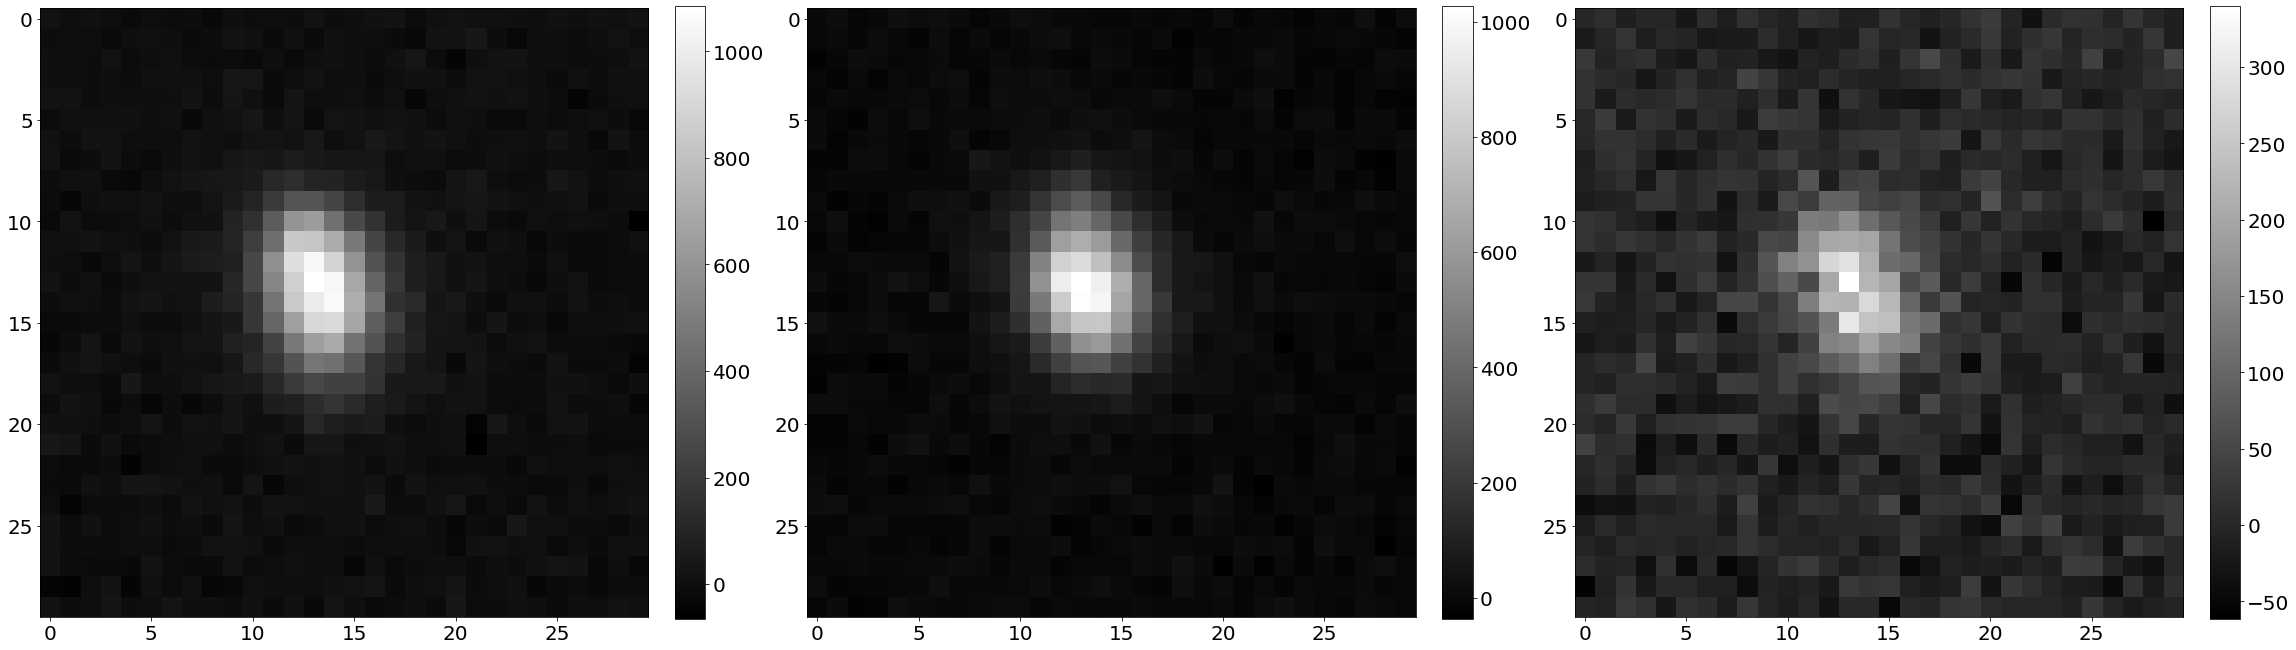

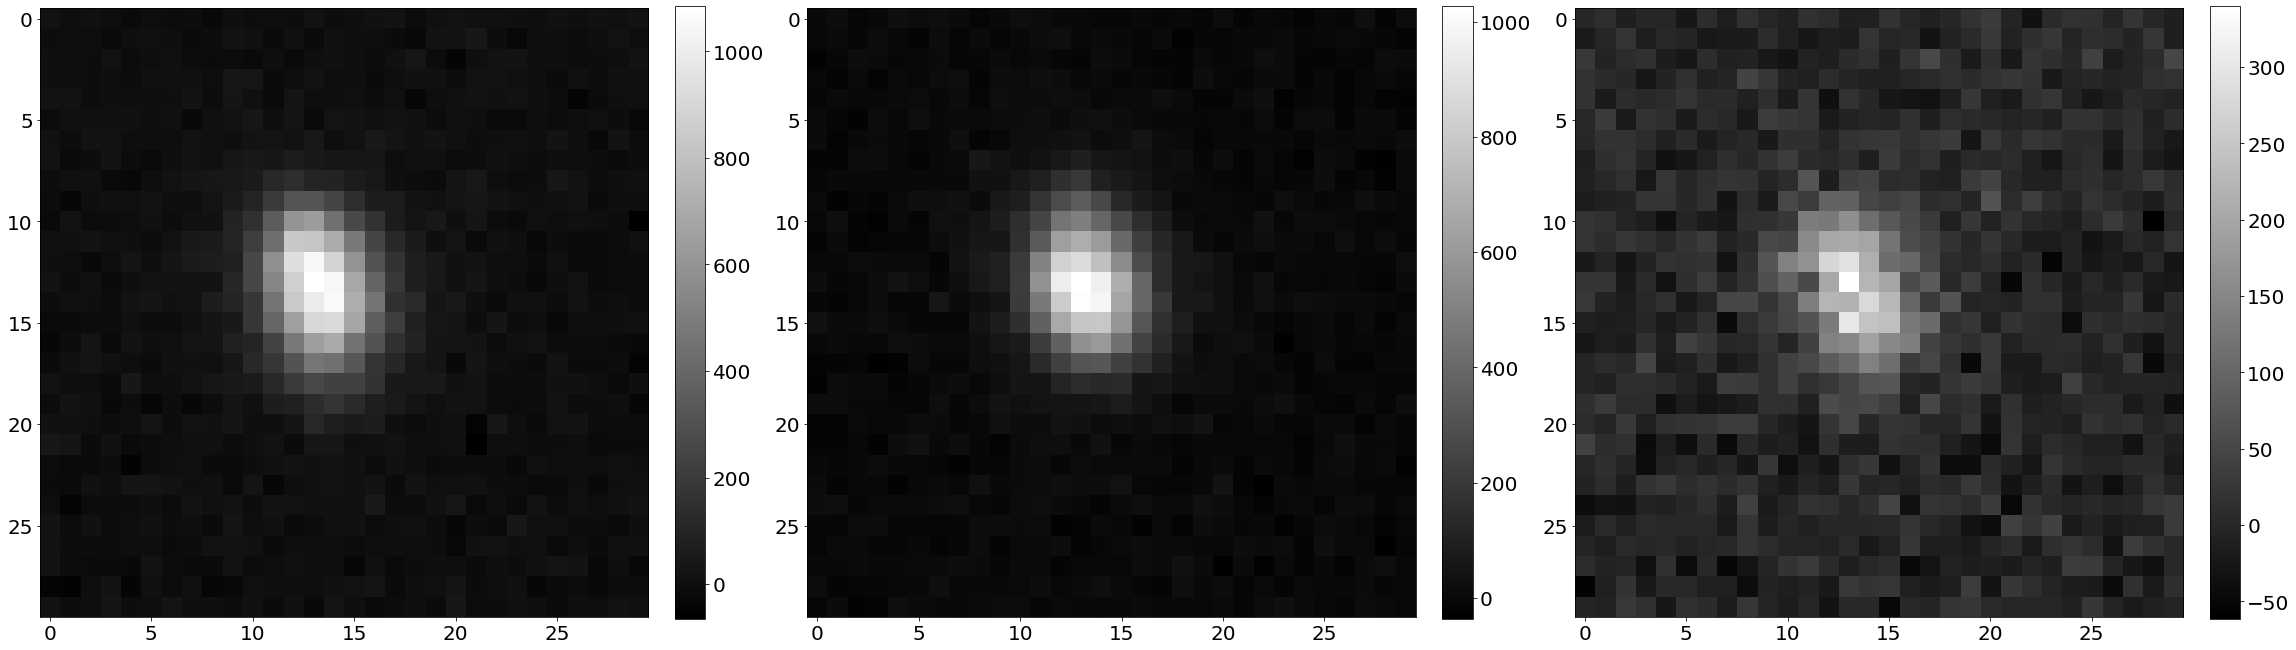

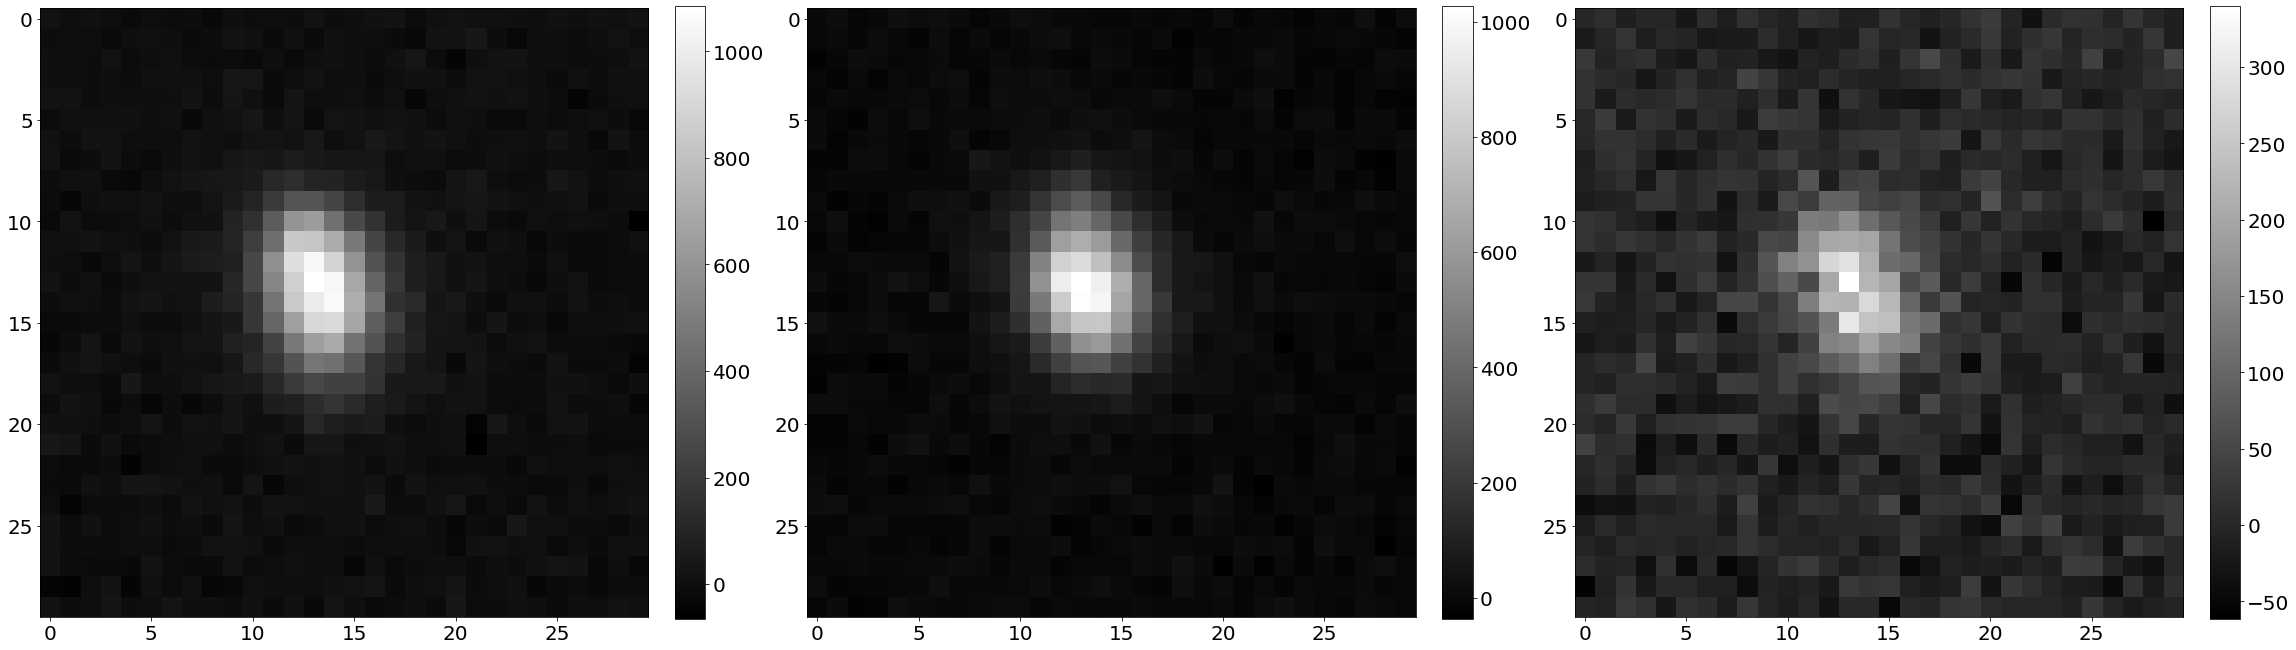

In [15]:
data = data_test_3[0:10]
fontSize = 20
for j in range(data.shape[0]):#3):
    fig, axs = plt.subplots(1,data.shape[3], figsize=(32, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.15)
    titles = ['New image','Reference image (Ref)', 'Difference image (Diff)']    
    axs    = axs.ravel()

    for i in range(1,data.shape[3]+1):
        varray = data[j,:,:,i-1]
        im     = axs[i-1].imshow(varray[:,:],cmap='gray')
        axs[i-1].tick_params(axis='both', labelsize=fontSize)
        #axs[i-1].axis('off')
        cb     = fig.colorbar(im,fraction=0.046, pad=0.04,ax=axs[i-1])
        cb.ax.tick_params(labelsize=fontSize)


#             axs[i-1].title.set_text(titles[i-1], {'fontsize':fontSize})

    plt.tight_layout()
    plt.show()

In [17]:
overall_real_prob, overall_dataframe = realbogus_prediction(
        model_name, data_test_3/255., ID_test, 0.5, model_path = model_path)
print (overall_real_prob)
print(overall_dataframe)

Loaded model:NET3_threshold_9_NRD from disk
[9.99998093e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99796093e-01
 9.99796093e-01 9.99796093e-01 9.99796093e-01 9.99796093e-01
 9.99796093e-01 9.99796093e-01 9.99796093e-01 9.99796093e-01
 9.99796093e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.90384221e-01
 9.90384221e-01 9.90384221e-01 9.90384221e-01 9.90384221e-01
 9.90384221e-01 9.90384221e-01 9.90384221e-01 9.90384221e-01
 9.90384221e-01 1.09013286e-06 1.09013286e-06 1.09013286e-06
 1.09013286e-06 1.09013286e-06 1.09013286e-06 1.09013286e-06
 1.09013286e-06 1.09013286e-06 1.09013286e-06 1.11002354e-08
 1.11002354e-08 1.11002354e-08 1.11002354e-08 1.11002354e-08
 1.11002354e-08 1.11002354e-08 1.11002354e-08 1.11002354e-08
 1.11002354e-08 9.99161482e-01 9.99161482